# Geopandas

Geopandas is a python library, based on Pandas (week 1), to work with geospatial data. You can use it to do all kinds of GIS-based calculations, without using a GIS. 
Disadvantage: all code, advantage: all code! 

Documentation: https://geopandas.org/

This notebook is based on the tutorial of Joris Van den Bossche (geopandas creator): https://github.com/jorisvandenbossche/geopandas-tutorial#installation-notes. Instructions to install Geopandas on your device can be found on his github, but as installing packages on different computers always gives errors we work in a predefined digital environment called binder. The binder loads all necessary packages for you based on the environment.yml file. So this should work...

In [1]:
%matplotlib inline

import pandas as pd
import geopandas

## Importing geospatial data

Geospatial data is often available from specific GIS file formats or data stores, like ESRI shapefiles, GeoJSON files, geopackage files, PostGIS (PostgreSQL) database, ...

We can use the GeoPandas library to read many of those GIS file formats (relying on the `fiona` library under the hood, which is an interface to GDAL/OGR), using the `geopandas.read_file` function.

For example, let's start by reading a shapefile with all the countries of the world (adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/, zip file is available in the `/data` directory), and inspect the data:

In [2]:
countries = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")
# or if the archive is unpacked:
# countries = geopandas.read_file("data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [3]:
countries.head() 

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


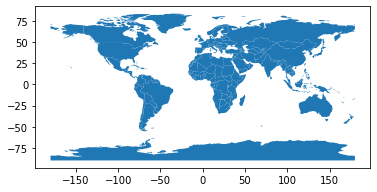

In [4]:
countries.plot()

What can we observe:

- Using `.head()` we can see the first rows of the dataset, just like we can do with Pandas.
- There is a 'geometry' column and the different countries are represented as polygons
- We can use the geopandas `.plot()` method to quickly get a *basic* visualization of the data. Other python libraries for cartographic vizualisation are for example cartopy, geoplot, plotly, folium, ipyleaflet,...

### What's a GeoDataFrame?

We used the GeoPandas library to read in the geospatial data, and this returned us a `GeoDataFrame`:

In [5]:
type(countries)

geopandas.geodataframe.GeoDataFrame

Such a `GeoDataFrame` is just like a pandas `DataFrame`, but with some additional functionality for working with geospatial data:

* It has a **'geometry' column** that holds the geometry information (or features in GeoJSON). The column name itself does not necessarily need to be 'geometry', but it will always be accessible as the `.geometry` attribute.
* The other columns are the **attributes** (or properties in GeoJSON) that describe each of the geometries

In [6]:
countries.geometry

0      POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1      MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...
2      POLYGON ((21.02004 40.84273, 20.99999 40.58000...
3      POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4      MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...
                             ...                        
172    MULTIPOLYGON (((167.84488 -16.46633, 167.51518...
173    POLYGON ((52.00001 19.00000, 52.78218 17.34974...
174    POLYGON ((19.89577 -24.76779, 20.16573 -24.917...
175    POLYGON ((23.21505 -17.52312, 22.56248 -16.898...
176    POLYGON ((29.43219 -22.09131, 28.79466 -21.639...
Name: geometry, Length: 177, dtype: geometry

The geometry column (or series) can be used for geometrical calculations. 

In [7]:
countries.geometry.area

0       63.593500
1      103.599439
2        3.185163
3        7.095047
4      278.923392
          ...    
172      0.631326
173     38.475618
174    112.718524
175     62.789498
176     32.280371
Length: 177, dtype: float64

**It's still a DataFrame**, so we have all the pandas functionality available to use on the geospatial dataset, and to do data manipulations with the attributes and geometry information together.

For example, we can calculate average population number over all countries (by accessing the 'pop_est' column, and calling the `mean` method on it):

In [8]:
countries['pop_est'].mean()

41712369.84180791

Or, we can use boolean filtering to select a subset of the dataframe based on a condition:

In [9]:
africa = countries[countries['continent'] == 'Africa']

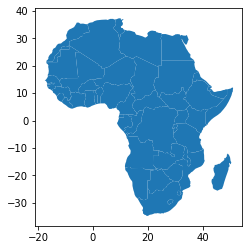

In [10]:
africa.plot()

<div class="alert alert-info" style="font-size:120%">

**REMEMBER:** <br>

* A `GeoDataFrame` allows to perform typical tabular data analysis together with spatial operations
* A `GeoDataFrame` (or *Feature Collection*) consists of:
    * **Geometries** or **features**: the spatial objects
    * **Attributes** or **properties**: columns with information about each spatial object

</div>

### Geometries: Points, Linestrings and Polygons

Spatial **vector** data can consist of different types, and the 3 fundamental types are:

![](img/simple_features_3_text.svg)

* **Point** data: represents a single point in space.
* **Line** data ("LineString"): represents a sequence of points that form a line.
* **Polygon** data: represents a filled area.


For the example we have seen up to now, the individual geometry objects are Polygons:

In [11]:
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


In [12]:
print(countries.geometry[2])

POLYGON ((21.0200403174764 40.84272695572588, 20.99998986174722 40.58000397395401, 20.67499677906363 40.43499990494303, 20.61500044117275 40.11000682225935, 20.15001590341052 39.62499766698397, 19.98000044117015 39.69499339452341, 19.96000166187321 39.91500580500605, 19.40608198413673 40.25077342382247, 19.31905887215714 40.72723012955356, 19.40354983895429 41.40956574153546, 19.54002729663711 41.71998607031276, 19.37176883309496 41.87754751237065, 19.37176816334725 41.8775506797835, 19.30448611825079 42.19574514420782, 19.73805138517963 42.68824738216557, 19.80161339689869 42.50009349219084, 20.07070000000004 42.58863000000008, 20.28375451018189 42.32025950781508, 20.52295000000004 42.21787000000006, 20.59024654668023 41.85540891928363, 20.59024743010491 41.85540416113361, 20.4631750830992 41.51508901627534, 20.60518191903736 41.08622630468523, 21.0200403174764 40.84272695572588))


Let's import some other datasets with different types of geometry objects.

A dateset about cities in the world (adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/, zip file is available in the `/data` directory), consisting of Point data:

In [13]:
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")

In [14]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


And a dataset of rivers in the world (from http://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-rivers-lake-centerlines/, zip file is available in the `/data` directory) where each river is a (multi-)line:

In [15]:
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

In [16]:
rivers.head()

,featurecla,name,geometry
0,Lake Centerline,Kama,"LINESTRING (51.93713 55.70107, 51.88087 55.686..."
1,River,Kama,"LINESTRING (53.69385 58.20632, 53.67715 58.273..."
2,Lake Centerline,Abay,"LINESTRING (37.11301 11.85499, 37.15037 11.893..."
3,Lake Centerline,Al Furat,"LINESTRING (38.56119 35.86264, 38.36534 35.903..."
4,Lake Centerline,Alabama,"MULTILINESTRING ((-86.52177 33.03212, -86.5209..."


### The `shapely` library

The individual geometry objects are provided by the [`shapely`](https://shapely.readthedocs.io/en/stable/) library

In [17]:
type(countries.geometry[0])

shapely.geometry.polygon.Polygon

To construct one ourselves:

In [18]:
from shapely.geometry import Point, Polygon, LineString

In [19]:
p = Point(0, 0)

In [20]:
print(p)

POINT (0 0)


In [21]:
polygon = Polygon([(1, 1), (2,2), (2, 1)])

In [22]:
polygon.area

0.5

In [23]:
polygon.distance(p)

1.4142135623730951

<div class="alert alert-info" style="font-size:120%">

**REMEMBER**: <br>

Single geometries are represented by `shapely` objects:

* If you access a single geometry of a GeoDataFrame, you get a shapely geometry object
* Those objects have similar functionality as geopandas objects (GeoDataFrame/GeoSeries). For example:
    * `single_shapely_object.distance(other_point)` -> distance between two points
    * `geodataframe.distance(other_point)` ->  distance for each point in the geodataframe to the other point

</div>

### Plotting our different layers together

[(-40.0, 40.0), (-20.0, 60.0)]

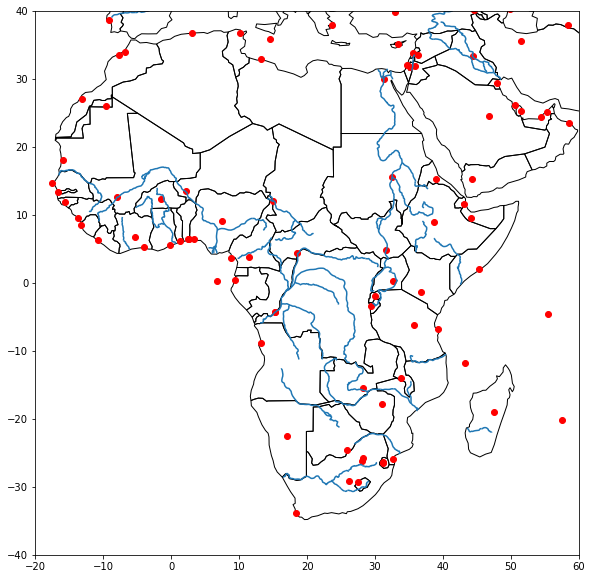

In [24]:
kaart = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=kaart)
cities.plot(ax=kaart, color='red')
kaart.set(xlim=(-20, 60), ylim=(-40, 40))

### Let's practice!

Throughout the exercises in this course, we will work with several datasets about the city of Paris.

Here, we start with the following datasets:

- The administrative districts of Paris (https://opendata.paris.fr/explore/dataset/quartier_paris/): `paris_districts_utm.geojson`
- Real-time (at the moment I downloaded them ..) information about the public bicycle sharing system in Paris (vélib, https://opendata.paris.fr/explore/dataset/stations-velib-disponibilites-en-temps-reel/information/): `data/paris_bike_stations_mercator.gpkg`

Both datasets are provided in the data folder.

Let's explore those datasets:

<div class="alert alert-success">

**EXERCISE**:

We will start with exploring the bicycle station dataset (available as a GeoPackage file: `data/paris_bike_stations_mercator.gpkg`)
    
* Read the stations datasets into a GeoDataFrame called `stations`.
* Check the type of the returned object
* Check the first rows of the dataframes. What kind of geometries does this datasets contain?
* How many features are there in the dataset?
    
</div>

<div class="alert alert-success">

**EXERCISE**:

* Make a quick plot of the `stations` dataset.
* Make the plot a bit larger byt setting the figure size to (12, 6)
 
</div>

A plot with just some points can be hard to interpret without any spatial context. Therefore, in the next exercise we will learn how to add a background map.

We are going to make use of the [contextily](https://github.com/darribas/contextily) package. The `add_basemap()` function of this package makes it easy to add a background web map to our plot. We begin by plotting our data first, and then pass the matplotlib axes object (returned by dataframe's `plot()` method) to the `add_basemap()` function. `contextily` will then download the web tiles needed for the geographical extent of your plot.




<div class="alert alert-success">

**EXERCISE**:

* Import `contextily`.
* Re-do the figure of the previous exercise: make a plot of all the points in `stations`, but assign the result to an `ax` variable.
* Set the marker size equal to 5 to reduce the size of the points (use the `markersize` keyword of the `plot()` method for this).
* Use in the same cell as `plot()` the `add_basemap()` function of `contextily` to add a background map: the first argument is the matplotlib axes object `ax`. 

</div>

<div class="alert alert-success">

**EXERCISE**:

* Make a histogram showing the distribution of the number of available bikes in the stations.

<details>
  <summary>Hints</summary>

* Selecting a column can be done with the square brackets: `df['col_name']`
* Single columns have a `hist()` method to plot a histogram of its values.
    
</details>
    
</div>

<div class="alert alert-success">

**EXERCISE**:

Let's now visualize where the available bikes are actually stationed in a choropleth map:
    
* Make a plot of the `stations` dataset (also with a (12, 6) figsize).
* Use the `'available_bikes'` colums to determine the color of the points.
* Include a legend in the plot.
 
</div>

<div class="alert alert-success">

**EXERCISE**:

Next, we will explore the dataset on the administrative districts of Paris (available as a GeoJSON file: "data/paris_districts_utm.geojson")

* Read the dataset into a GeoDataFrame called `districts`.
* Check the first rows of the dataframe. What kind of geometries does this dataset contain?
* How many features are there in the dataset?
* Make a quick plot of the `districts` dataset.
    
</div>

<div class="alert alert-success">

**EXERCISE**:
    
What are the largest districts (biggest area)?

* Calculate the area of each district.
* Add this area as a new column to the `districts` dataframe.
* Sort the dataframe by this area column for largest to smallest values (descending).

<details><summary>Hints</summary>

* Adding a column can be done by assing values to a column using the same square brackets syntax: `df['new_col'] = values`
* To sort the rows of a DataFrame, use the `sort_values()` method, specifying the colum to sort on with the `by='col_name'` keyword. Check the help of this method to see how to sort ascending or descending.

</details>

</div>

<div class="alert alert-success">

**EXERCISE**:

* Add a column `'population_density'` representing the number of inhabitants per squared kilometer (Note: The area is given in squared meter, so you will need to multiply the result with `10**6`).
* Plot the districts using the `'population_density'` to color the polygons and include a legend.

</div>

## Creating geodataframes

Besides importing geospatial data with `read_file`, geodataframes can also be created manually of from a pandas dataframe with `GeoDataFrame`. 

### Manually

In [42]:
from shapely.geometry import Point, Polygon, LineString
geopandas.GeoDataFrame({
    'geometry': [Point(1, 1), Point(2, 2)],
    'attribute1': [1, 2],
    'attribute2': [0.1, 0.2]})

,geometry,attribute1,attribute2
0,POINT (1.00000 1.00000),1,0.1
1,POINT (2.00000 2.00000),2,0.2


### Creating a GeoDataFrame from an existing dataframe

For example, if you have lat/lon coordinates in two columns:

In [43]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [44]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [45]:
gdf

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000)


## Coordinate reference systems

Up to now, we have used the geometry data with certain coordinates without further wondering what those coordinates mean or how they are expressed.

A GeoDataFrame or GeoSeries has a `.crs` attribute which holds (optionally) a description of the coordinate reference system of the geometries:

In [46]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

For the `countries` dataframe, it indicates that it uses the EPSG 4326 / WGS84 lon/lat reference system, which is one of the most used for geographic coordinates.


It uses coordinates as latitude and longitude in degrees, as can be seen from the x/y labels on the plot:

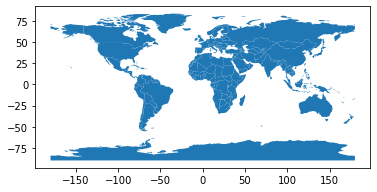

In [47]:
countries.plot()

However, calculating the area or length of data in degrees would not be very meaningful. To calculate these values, we always use cartesian projections in meters, such as Lambert72.

### Transforming to another CRS

We can convert a GeoDataFrame to another reference system using the `to_crs` function. 

For example, let's convert the countries to the World Mercator projection (http://epsg.io/3395):

In [48]:
# remove Antartica, as the Mercator projection cannot deal with the poles
countries = countries[(countries['name'] != "Antarctica")]

In [49]:
countries_mercator = countries.to_crs(epsg=3395)

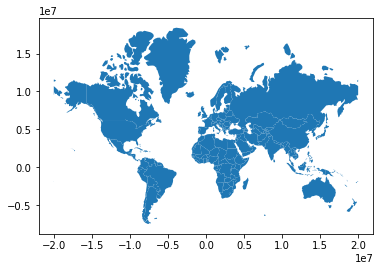

In [50]:
countries_mercator.plot()

Note the different scale of x and y.

Under the hood, GeoPandas uses the `pyproj` / `PROJ` libraries to deal with the re-projections.
For more information, see also http://geopandas.readthedocs.io/en/latest/projections.html.

### Let's practice!

We are going back to the Paris datasets, but to a file that does not contain the right CRS (as opposed to the files of the previous excercises): `"data/paris_districts.geojson"`. The CRS for France is the RGF93 / Lambert-93 reference system, referenced by the `EPSG:2154` number


<div class="alert alert-success">

**EXERCISE: Projecting a GeoDataFrame**

* Read the districts datasets (`"data/paris_districts.geojson"`) into a GeoDataFrame called `districtsCRS`.
* Look at the CRS attribute of the GeoDataFrame.
* Make a simple plot of the `districtsCRS` dataset.
* Calculate the area of all districts.
* Convert the `districtsCRS` to a projected CRS (using the `EPSG:2154` for France). Call the new dataset `districts_RGF93`.
* Make a similar plot of `districts_RGF93`.
* Calculate the area of all districts again with `districts_RGF93` (the result will now be expressed in m²).
    


</div>

<div class="alert alert-success">

**EXERCISE:**

In the first notebook, we did an exercise on plotting the bike stations locations in Paris and adding a background map to it using the `contextily` package.

Currently, `contextily` assumes that your data is in the Web Mercator projection, the system used by most web tile services. And in that first exercise, we provided the data in the appropriate CRS so you didn't need to care about this aspect.

However, typically, your data will not come in Web Mercator (`EPSG:3857`) and you will have to align them with web tiles on your own.
    
* Read the bike stations datasets (`"data/paris_bike_stations.geojson"`) into a GeoDataFrame called `stationsCRS`.
* Make a plot of this geodataframe (markersize 5) and add a contextily basemap. Do you see Paris on the basemap?
* Convert the `stationsCRS` dataset to the Web Mercator projection (`EPSG:3857`). Call the result `stations_webmercator`, and inspect the result.
* Make again a plot with basemap, can you see Paris now? 

</div>

## Spatial relationships and operations

An important aspect of geospatial data is that we can look at *spatial relationships*: how two spatial objects relate to each other (whether they overlap, intersect, contain, .. one another).

The topological, set-theoretic relationships in GIS are typically based on the DE-9IM model. See https://en.wikipedia.org/wiki/Spatial_relation for more information.

![](img/TopologicSpatialRelarions2.png)
(Image by [Krauss, CC BY-SA 3.0](https://en.wikipedia.org/wiki/Spatial_relation#/media/File:TopologicSpatialRelarions2.png))

### Relationships between individual objects

Let's first create some small toy spatial objects:

A polygon:

In [230]:
belgium = countries.loc[countries['name'] == 'Belgium', 'geometry'].squeeze()

Two points:

In [231]:
paris = cities.loc[cities['name'] == 'Paris', 'geometry'].squeeze()
brussels = cities.loc[cities['name'] == 'Brussels', 'geometry'].squeeze()

And a linestring:

In [64]:
from shapely.geometry import LineString
line = LineString([paris, brussels])

Let's visualize those 4 geometry objects together (I only put them in a GeoSeries to easily display them together with the geopandas `.plot()` method):

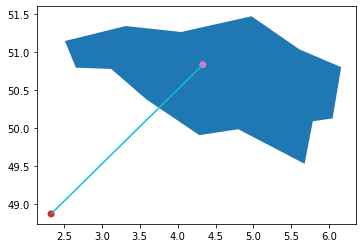

In [65]:
geopandas.GeoSeries([belgium, paris, brussels, line]).plot(cmap='tab10')

You can recognize the abstract shape of Belgium.

Brussels, the capital of Belgium, is thus located within Belgium. This is a spatial relationship, and we can test this using the individual shapely geometry objects as follow:

In [66]:
brussels.within(belgium)

True

And using the reverse, Belgium contains Brussels:

In [67]:
belgium.contains(brussels)

True

On the other hand, Paris is not located in Belgium:

In [68]:
belgium.contains(paris)

False

In [69]:
paris.within(belgium)

False

The straight line we draw from Paris to Brussels is not fully located within Belgium, but it does intersect with it:

In [70]:
belgium.contains(line)

False

In [71]:
line.intersects(belgium)

True

<b>Attention:</b> note that we have to use `squeeze()` or `item()` to access the single geometry object for calculations on this geometry. Without `squeeze()`, a series would be returned (with index and value). The same happens with any other column of a dataframe. 

In [248]:
countries.loc[countries['name']=='Belgium', 'name']

12    Belgium
Name: name, dtype: object

In [244]:
countries.loc[countries['name']=='Belgium', 'name'].squeeze()

'Belgium'

In [245]:
countries.loc[countries['name']=='Belgium', 'geometry']

12    POLYGON ((4.04707 51.26726, 4.97399 51.47502, ...
Name: geometry, dtype: geometry

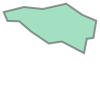

In [246]:
countries.loc[countries['name']=='Belgium', 'geometry'].squeeze()

### Spatial relationships with GeoDataFrames

The same methods that are available on individual `shapely` geometries as we have seen above, are also available as methods on `GeoSeries` / `GeoDataFrame` objects.

For example, if we call the `contains` method on the world dataset with the `paris` point, it will do this spatial check for each country in the `world` dataframe:

In [72]:
countries.contains(paris)

0      False
1      False
2      False
3      False
4      False
       ...  
172    False
173    False
174    False
175    False
176    False
Length: 176, dtype: bool

Because the above gives us a boolean result, we can use that to filter the dataframe, as we are used to do with pandas:

In [73]:
countries[countries.contains(paris)]

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
55,FRA,France,Europe,67106161.0,2699000.0,"MULTIPOLYGON (((2.51357 51.14851, 2.65842 50.7..."


And indeed, France is the only country in the world in which Paris is located.

<div class="alert alert-info" style="font-size:120%">

**REMEMBER**:

Overview of the different functions to check spatial relationships (*spatial predicate functions*):

* `equals`
* `contains`
* `crosses`
* `disjoint`
* `intersects`
* `overlaps`
* `touches`
* `within`
* `covers`


See https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships for an overview of those methods.

</div>

### Let's practice!

We will again use the Paris datasets to do some exercises, but now we will import them and immediately convert them to the cartesian crs.

In [74]:
districts = geopandas.read_file("data/paris_districts.geojson").to_crs(epsg=2154)
stations = geopandas.read_file("data/paris_bike_stations.geojson").to_crs(epsg=2154)

<div class="alert alert-success">

**EXERCISE: The Eiffel Tower**

You all know the Eiffel tower, but maybe you didn't know it's Lam93 coordinates: x is 648237.3 and y is 6862271.9.

* Create a Shapely point object with the coordinates of the Eiffel Tower and assign it to a variable called `eiffel_tower`. Print the result.
* Check if the Eiffel Tower is located within the Montparnasse district.
* Check if bike station 293 is located in the Montparnasse district. Hint: you can select a row and the geometry column with loc. 
* Calculate the distance between the Eiffel Tower and the bike station (note: in this case, the distance is returned in meters).

</div>

<div class="alert alert-success">

**EXTRA**

Plot the two points (Eiffel tower and bike station) with a contextily base map. Hint: you have to create a GeoDataFrame or a GeoSeries of the points first and define the crs of the points. Then you can convert the crs for the basemap. 
</div>

<div class="alert alert-success">

**EXERCISE: In which district in the Eiffel Tower located?**

In previous exercise, we constructed a `Point` geometry for its location, and we checked that it was not located in the Montparnasse district. Let's now determine in which of the districts of Paris it *is* located.

* Create a boolean mask (or filter) indicating whether each district contains the Eiffel Tower or not and filter the `districts` dataframe with the boolean mask (like we do with pandas).


</div>

<div class="alert alert-success">

**EXERCISE: How far is the closest bike station?**

Now, we might be interested in the bike stations nearby the Eiffel Tower. To explore them, let's visualize the Eiffel Tower itself as well as the bikes stations within 1km.

To do this, we can calculate the distance to the Eiffel Tower for each of the stations. Based on this result, we can then create a mask that takes `True` if the station is within 1km, and `False` otherwise, and use it to filter the stations GeoDataFrame. Finally, we make a visualization of this subset.

* Calculate the distance to the Eiffel Tower for each station, and call the result `dist_eiffel`.
* Print the distance to the closest station (which is the minimum of `dist_eiffel`).
* Select the rows the `stations` GeoDataFrame where the distance to the Eiffel Tower is less than 1 km (note that the distance is in meters). Call the result `stations_eiffel`.

<details><summary>Hints</summary>

* The `distance()` method of a GeoDataFrame works element-wise: it calculates the distance between each geometry in the GeoDataFrame and the geometry passed to the method.
* A Series has a `min()` method to calculate the minimum value.
* To create a boolean mask based on a condition, we can do e.g. `s < 100`.

</details>

</div>

### Spatial operations

Next to the spatial predicates that return boolean values, Shapely and GeoPandas also provide operations that return new geometric objects.

**Binary operations:**

<table><tr>
<td> <img src="img/spatial-operations-base.png"/> </td>
<td> <img src="img/spatial-operations-intersection.png"/> </td>
</tr>
<tr>
<td> <img src="img/spatial-operations-union.png"/> </td>
<td> <img src="img/spatial-operations-difference.png"/> </td>
</tr></table>

**Buffer:**

<table><tr>
<td> <img src="img/spatial-operations-buffer-point1.png"/> </td>
<td> <img src="img/spatial-operations-buffer-point2.png"/> </td>
</tr>
<tr>
<td> <img src="img/spatial-operations-buffer-line.png"/> </td>
<td> <img src="img/spatial-operations-buffer-polygon.png"/> </td>
</tr></table>


See https://shapely.readthedocs.io/en/stable/manual.html#spatial-analysis-methods for more details.

For example, using the examples from above, let's construct a buffer around Brussels (which returns a Polygon):

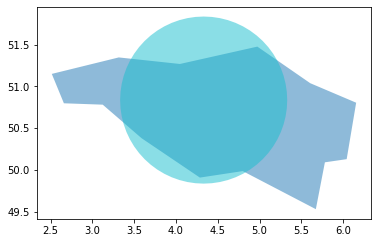

In [84]:
geopandas.GeoSeries([belgium, brussels.buffer(1)]).plot(alpha=0.5, cmap='tab10')

Note this a buffer of one degree as the crs of Brussels is WGS84.

and now take the intersection, union or difference of those two polygons:

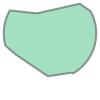

In [85]:
belgium.intersection(brussels.buffer(1))

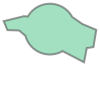

In [86]:
belgium.union(brussels.buffer(1))

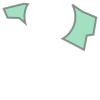

In [87]:
belgium.difference(brussels.buffer(1))

Another useful method is the `unary_union` attribute, which converts the set of geometry objects in a GeoDataFrame into a single geometry object by taking the union of all those geometries (~ dissolve in GIS).

For example, we can construct a single object for the Africa continent:

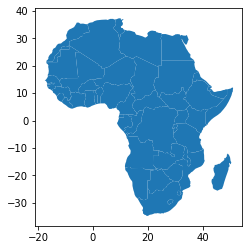

In [88]:
africa_countries = countries[countries['continent'] == 'Africa']
africa_countries.plot()

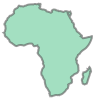

In [89]:
africa = africa_countries.unary_union
africa

<div class="alert alert-info" style="font-size:120%">

**REMEMBER**:

GeoPandas (and Shapely for the individual objects) provides a whole lot of basic methods to analyse the geospatial data (distance, length, centroid, boundary, convex_hull, simplify, transform, ....), much more than the few that we can touch in this tutorial.


* An overview of all methods provided by GeoPandas can be found here: http://geopandas.readthedocs.io/en/latest/reference.html


</div>



### Let's practice!

<div class="alert alert-success">
 <b>EXERCISE: What are the districts close to the Seine?</b>
 
 <p>
 Below, the geodataframe for the Seine river in the neighbourhood of Paris is provided and a visualization of the Seine running through the districts of Paris. 
 </p>
 
  <p>
 Based on this `seine` object, we want to know which districts are located close (maximum 150 m) to the Seine. 
 </p>
 
 
 <p>
 <ul>
  <li>Create a buffer of 150 m around the Seine.</li>
  <li>Check which districts intersect with this buffered object.</li>
  <li>Plot these districts.</li>
 </ul> 
 </p>
 
</div>

In [90]:
# created a line with http://geojson.io
seine = geopandas.GeoDataFrame.from_features({"type":"FeatureCollection","features":[{"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[2.408924102783203,48.805619828930226],[2.4092674255371094,48.81703747481909],[2.3927879333496094,48.82325391133874],[2.360687255859375,48.84912860497674],[2.338714599609375,48.85827758964043],[2.318115234375,48.8641501307046],[2.298717498779297,48.863246707697],[2.2913360595703125,48.859519915404825],[2.2594070434570312,48.8311646245967],[2.2436141967773438,48.82325391133874],[2.236919403076172,48.82347994904826],[2.227306365966797,48.828339513221444],[2.2224998474121094,48.83862215329593],[2.2254180908203125,48.84856379804802],[2.2240447998046875,48.85409863123821],[2.230224609375,48.867989496547864],[2.260265350341797,48.89192242750887],[2.300262451171875,48.910203080780285]]}}]},
                                               crs={'init': 'epsg:4326'})

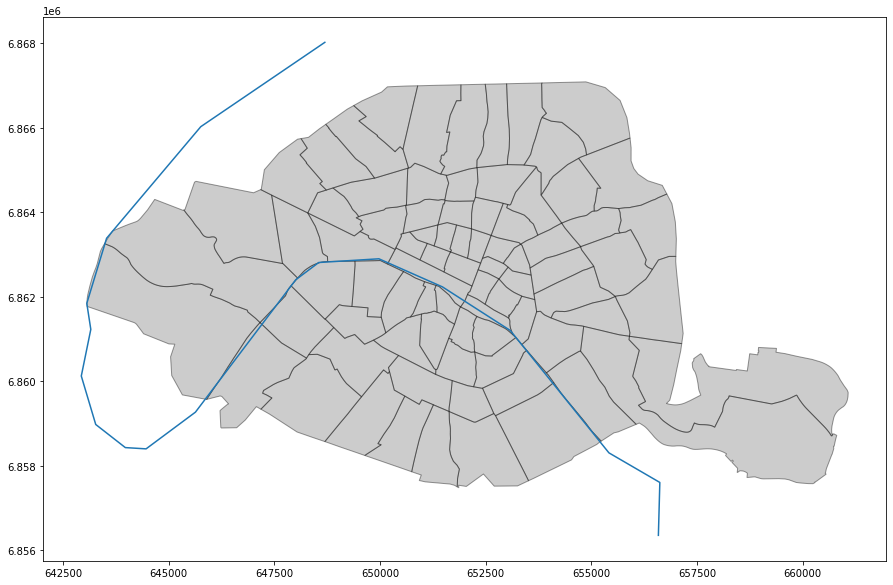

In [91]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
districts.plot(ax=ax, color='grey', alpha=0.4, edgecolor='k')
seine.to_crs(epsg=2154).plot(ax=ax)

## Spatial joins

### Recap - joining dataframes

Pandas provides functionality to join or merge dataframes in different ways, see https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/ for an overview and https://pandas.pydata.org/pandas-docs/stable/merging.html for the full documentation.

To illustrate the concept of joining the information of two dataframes with pandas, let's take a small subset of our `cities` and `countries` datasets: 

In [96]:
cities2 = cities[cities['name'].isin(['Bern', 'Brussels', 'London', 'Paris'])].copy()
cities2['iso_a3'] = ['CHE', 'BEL', 'GBR', 'FRA']
cities2

,name,geometry,iso_a3
26,Bern,POINT (7.46698 46.91668),CHE
170,Brussels,POINT (4.33137 50.83526),BEL
219,London,POINT (-0.11867 51.50194),GBR
235,Paris,POINT (2.33139 48.86864),FRA


In [97]:
countries2 = countries[['iso_a3', 'name', 'continent']]
countries2.head()

,iso_a3,name,continent
0,AFG,Afghanistan,Asia
1,AGO,Angola,Africa
2,ALB,Albania,Europe
3,ARE,United Arab Emirates,Asia
4,ARG,Argentina,South America


We added a 'iso_a3' column to the `cities` dataset, indicating a code of the country of the city. This country code is also present in the `countries` dataset, which allows us to merge those two dataframes based on the common column.

Joining the `cities` dataframe with `countries` will transfer extra information about the countries (the full name, the continent) to the `cities` dataframe, based on a common key:

In [98]:
cities2.merge(countries2, on='iso_a3')

,name_x,geometry,iso_a3,name_y,continent
0,Bern,POINT (7.46698 46.91668),CHE,Switzerland,Europe
1,Brussels,POINT (4.33137 50.83526),BEL,Belgium,Europe
2,London,POINT (-0.11867 51.50194),GBR,United Kingdom,Europe
3,Paris,POINT (2.33139 48.86864),FRA,France,Europe


**But**, for this illustrative example, we used an attribute. Another possibility is joining on the geometry with geopandas! 

## Spatial join operation

<div class="alert alert-info" style="font-size:120%">
    
**SPATIAL JOIN** = *transferring attributes from one layer to another based on their spatial relationship* <br>


Different parts of this operations:

* The GeoDataFrame to which we want add information
* The GeoDataFrame that contains the information we want to add
* The spatial relationship we want to use to match both datasets ('intersects', 'contains', 'within')
* The type of join: left or inner join


![](img/illustration-spatial-join.svg)

</div>

In this case, we want to join the `cities` dataframe with the information of the `countries` dataframe, based on the spatial relationship between both datasets.

We use the [`geopandas.sjoin`](http://geopandas.readthedocs.io/en/latest/reference/geopandas.sjoin.html) function:

In [102]:
joined = geopandas.sjoin(cities, countries, op='within', how='left')

In [103]:
joined.head(1)

,name_left,geometry,index_right,iso_a3,name_right,continent,pop_est,gdp_md_est
0,Vatican City,POINT (12.45339 41.90328),79.0,ITA,Italy,Europe,62137802.0,2221000.0


In [104]:
joined['continent'].value_counts()

Asia             59
Africa           57
Europe           46
North America    26
South America    14
Oceania           8
Name: continent, dtype: int64

### Lets's practice!

We will again use the Paris datasets `districts`and `stations` to do some exercises. Let's start importing them again:

In [121]:
districts = geopandas.read_file("data/paris_districts.geojson").to_crs(epsg=2154)
stations = geopandas.read_file("data/paris_bike_stations.geojson").to_crs(epsg=2154)

<div class="alert alert-success">

**EXERCISE:**

* Determine for each bike station in which district it is located (using a spatial join!). Call the result `joined`.

</div>

<div class="alert alert-success">

**EXERCISE: Map of tree density by district (I)**

Using a dataset of all trees in public spaces in Paris, the goal is to make a map of the tree density by district. For this, we first need to find out how many trees each district contains, which we will do in this exercise. In the following exercise, we will then use this result to calculate the density and create a map.

To obtain the tree count by district, we first need to know in which district each tree is located, which we can do with a spatial join. Then, using the result of the spatial join, we will calculate the number of trees located in each district using the pandas 'group-by' functionality.

- Import the trees dataset `"data/paris_trees.gpkg"` and call the result `trees`. Convert the districts dataset to the same CRS as the trees dataset and call it `districtsCRST`.
- Add a column with the `'district_name'` to the trees dataset using a spatial join. Call the result `joined`.

</div>

<div class="alert alert-success">

**EXERCISE: Map of tree density by district (II)**

- Calculate the number of trees located in each district: group the `joined` DataFrame by the `'district_name'` column, and calculate the size of each group. We convert the resulting Series `trees_by_district` to a DataFrame with columns `district_name` and `n_trees` for the next exercise.

<details><summary>Hints</summary>

- look into the `groupby` and `to_frame` methods of pandas.


</details>

</div>

<div class="alert alert-success">

**EXERCISE: Map of tree density by district (III)**

Now we have obtained the number of trees by district, we can make the map of the districts colored by the tree density.

For this, we first need to merge the number of trees in each district we calculated in the previous step (`trees_by_district`) back to the districts dataset. We will use the [`pd.merge()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html) function to join two dataframes based on a common column.

Since not all districts have the same size, it is a fairer comparison to visualize the tree density: the number of trees relative to the area.

- Use the `pd.merge()` function to merge `districts` and `trees_by_district` dataframes on the `'district_name'` column. Call the result `districts_trees`.
- Add a column `'n_trees_per_area'` to the `districts_trees` dataframe, based on the `'n_trees'` column divided by the area.
- Make a plot of the `districts_trees` dataframe, using the `'n_trees_per_area'` column to determine the color of the polygons.

</div>

### The overlay operation

In the spatial join operation above, we are not changing the geometries itself. We are not joining geometries, but joining attributes based on a spatial relationship between the geometries. 
If you want to create new geometries based on joining (combining) geometries of different dataframes into one new dataframe (eg by taking the intersection of the geometries), you want an **overlay** operation, like in the example below.

In [155]:
africa = countries[countries['continent'] == 'Africa']

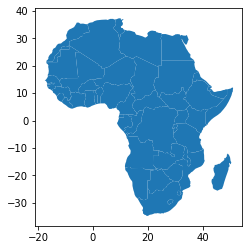

In [156]:
africa.plot()

In [157]:
cities['geometry'] = cities.buffer(2)

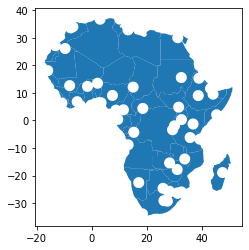

In [158]:
geopandas.overlay(africa, cities, how='difference').plot()

<div class="alert alert-info" style="font-size:120%">
<b>REMEMBER</b> <br>

* **Spatial join**: transfer attributes from one dataframe to another based on the spatial relationship
* **Spatial overlay**: construct new geometries based on spatial operation between both dataframes (and combining attributes of both dataframes)

</div>

<div class="alert alert-success">

**EXERCISE: Exploring a Land Use dataset**

For the following exercises, we first introduce a new dataset: a dataset about the land use of Paris (a simplified version based on the open European [Urban Atlas](https://land.copernicus.eu/local/urban-atlas)). The land use indicates for what kind of activity a certain area is used, such as residential area or for recreation. It is a polygon dataset, with a label representing the land use class for different areas in Paris.

In this exercise, we will read the data, explore it visually, and calculate the total area of the different classes of land use in the area of Paris.

* Read in the zip file with this path: `'zip://./data/paris_land_use.zip'` and assign the result to a variable `land_use`.
* Make a plot of `land_use`, using the `'class'` column to color the polygons. We also add a legend. Note: it might take a few seconds for the plot to generate because there are a lot of polygons.
* Add a new column `'area'` with the area of each polygon.
* Calculate the total area in km² for each `'class'` using the `groupby()` method, and print the result.

</div>

<div class="alert alert-success">

**EXERCISE: Intersection of two polygons**

For this exercise, we are going to use 2 individual polygons: the district of Muette extracted from the `districts` dataset, and the green urban area of Boulogne, a large public park in the west of Paris, extracted from the `land_use` dataset. The two polygons have already been assigned to the `muette` and `park_boulogne` variables.

We first visualize the two polygons. You will see that they overlap, but the park is not fully located in the district of Muette. Let's determine the overlapping part.

* Calculate the intersection of the `park_boulogne` and `muette` polygons.
* Print the proportion of the area of the district that is occupied by the park.

<details><summary>Hints</summary>

* You do not need to use the overlay here, the intersection of two scalar polygons can be calculated with the `intersection()` method of one of the polygons, and passing the other polygon as the argument to that method.

</details>

</div>

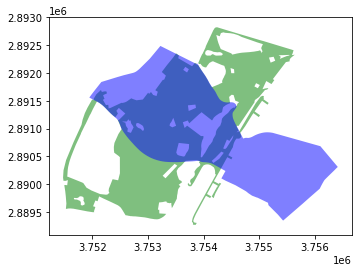

In [176]:
#read datasets
land_use = geopandas.read_file("zip://./data/paris_land_use.zip")
districts = geopandas.read_file("data/paris_districts.geojson").to_crs(land_use.crs)
# extract polygons
land_use['area'] = land_use.geometry.area
park_boulogne = land_use[land_use['class'] == "Green urban areas"].sort_values('area').geometry.iloc[-1]
muette = districts[districts.district_name == 'Muette'].geometry.squeeze()
# Plot the two polygons
geopandas.GeoSeries([park_boulogne, muette]).plot(alpha=0.5, color=['green', 'blue'])

<div class="alert alert-success">

**EXERCISE: Intersecting a GeoDataFrame with a Polygon**

Combining the land use dataset and the districts dataset, we can now investigate what the land use is in a certain district.

For that, we first need to determine the intersection of the land use dataset with a given district. Let's take again the *Muette* district as example case.

* Calculate the intersection of the `land_use` polygons with the single `muette` polygon. Call the result `land_use_muette`.
* Make a quick plot of this intersection, and pass `edgecolor='black'` to more clearly see the boundaries of the different polygons.
* Print the first five rows of `land_use_muette`.

<details><summary>Hints</summary>

* The intersection of each geometry of a GeoSeries with another single geometry can be performed with the `intersection()` method of a GeoSeries.
* The `intersection()` method takes as argument the geometry for which to calculate the intersection.

</details>

</div>

You can see in the plot that we now only have a subset of the full land use dataset. The `land_use_muette` still has the same number of rows as the original `land_use`, though. But many of the rows, as you could see by printing the first rows, consist now of empty polygons when it did not intersect with the Muette district.

<div class="alert alert-success">

**EXERCISE: Overlaying spatial datasets**

We will now combine both datasets in an overlay operation. Create a new `GeoDataFrame` consisting of the intersection of the land use polygons wich each of the districts, but make sure to bring the attribute data from both source layers.

Once we created the overlay of the land use and districts datasets, we can more easily inspect the land use for the different districts. Let's get back to the example district of Muette, and inspect the land use of that district.

* Create a new GeoDataFrame from the intersections of `land_use` and `districts`. Assign the result to a variable `combined`.
* Print the first rows of the resulting GeoDataFrame (`combined`).
* Add a new column `'area'` with the area of each polygon to the `combined` GeoDataFrame.
* Create a subset called `land_use_muette` where the `'district_name'` is equal to "Muette".
* Make a plot of `land_use_muette`, using the `'class'` column to color the polygons.
* Calculate the total area in km² for each `'class'` of `land_use_muette` using the `groupby()` method, and print the result.

<details><summary>Hints</summary>

* The intersection of two GeoDataFrames can be calculated with the `geopandas.overlay()` function.
</details>

</div>

By overlaying, there are no empty geometries created in the original dataframe (as is the case with the intersection), but a new one is made with new polygons, which is easier for calculations. 